# Saving peaks' information to hdf and retrieving them

In [1]:
from nasagamma import  spectrum as sp
import numpy as np
import pandas as pd
from nasagamma import peaksearch as ps
from nasagamma import peakfit as pf


Instantiate a Spectrum object and a PeakSearch object as shown in the previous examples

In [9]:
# dataset 1
file = "data/SSR-mcnp.hdf"
df = pd.read_hdf(file, key='data')
df = df.iloc[1:,:]

cts_np = df.cts.to_numpy() * 1e8
erg = np.array(df.index)

# Required input parameters (always in channels)
fwhm_at_0 = 1.0
ref_fwhm = 31
ref_x = 1220
min_snr = 1

# instantiate a Spectrum object
spect = sp.Spectrum(counts=cts_np, energies=erg, e_units="MeV")

# peaksearch class
search = ps.PeakSearch(spect, ref_x, ref_fwhm, fwhm_at_0, min_snr=min_snr)

Create a list of backgrounds to use in the fit and a list of ranges encompassing the peaks of interest

In [14]:
bkgs = ["poly2", "poly1", "poly1", "poly1", "poly2", "poly1",
        "poly1", "poly1", "poly1", "poly2"]

In [15]:
ranges_e = [[0.72, 0.9],
            [0.95, 1.1],
            [1.46 , 1.87],
            [2.13, 2.3],
            [2.58, 3.52],
            [3.57 , 4.0],
            [4.3 , 4.6],
            [4.98 , 5.23],
            [5.44, 5.78],
            [5.99, 7.4]]

Save peaks and their fits to a pandas dataframe using the AddPeaks class

In [16]:
# save peaks
fitted_peaks = pf.AddPeaks("fitted_peaks_example")
for ran, bk in zip(ranges_e, bkgs):
    fit = pf.PeakFit(search, ran, bkg=bk)
    fitted_peaks.add_peak(fit)

Working with energy values
Found 2 peak(s) within range [0.72, 0.9]
Fit succeeded.
Working with energy values
Found 1 peak(s) within range [0.95, 1.1]
Fit succeeded.
Working with energy values
Found 3 peak(s) within range [1.46, 1.87]


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:2490: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->Index(['x_data', 'y_data', 'mean', 'area', 'fwhm', 'best_fit', 'redchi',
       'gauss', 'uncertainty', 'bkg', 'bkg_type', 'mean_err', 'area_err',
       'fwhm_err', 'x_units'],
      dtype='object')]

  pytables.to_hdf(


Fit succeeded.
Working with energy values
Found 1 peak(s) within range [2.13, 2.3]
Fit succeeded.
Working with energy values
Found 5 peak(s) within range [2.58, 3.52]
Fit succeeded.
Working with energy values
Found 2 peak(s) within range [3.57, 4.0]
Fit succeeded.
Working with energy values
Found 1 peak(s) within range [4.3, 4.6]
Fit succeeded.
Working with energy values
Found 1 peak(s) within range [4.98, 5.23]
Fit succeeded.
Working with energy values
Found 1 peak(s) within range [5.44, 5.78]
Fit succeeded.
Working with energy values
Found 5 peak(s) within range [5.99, 7.4]
Fit succeeded.


Now, we can open the created hdf file above and plot the relevant Gaussian components

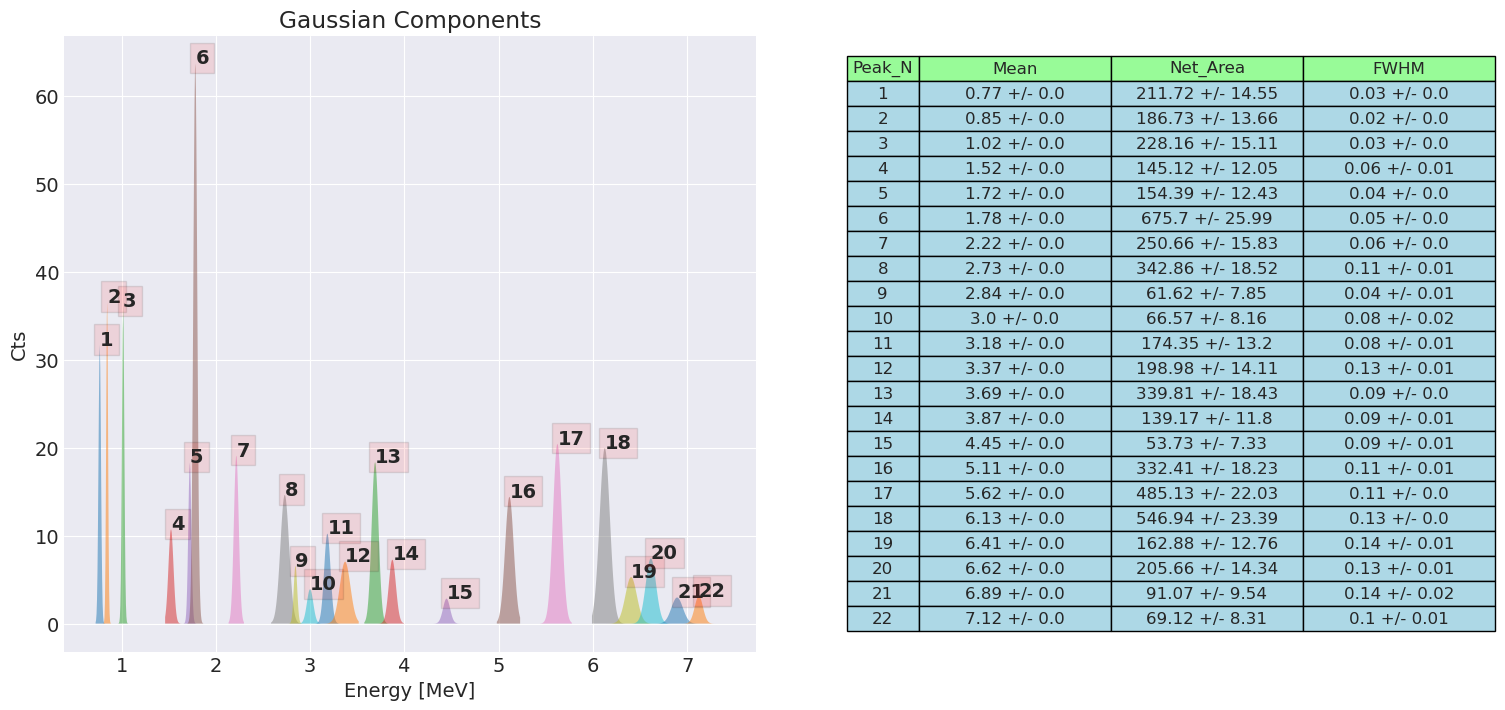

In [17]:
dfp = pd.read_hdf("fitted_peaks_example.hdf", key="data")

# plot gaussian components
gc = pf.GaussianComponents(df_peak=dfp)
gc.plot_gauss(plot_type="full", table_scale=[1,1.5])

Note that we purposely ignored the 511 keV peak because it is too large compared to the others (better visualization)

In [20]:
list(dfp.columns)

['x_data',
 'y_data',
 'mean',
 'area',
 'fwhm',
 'best_fit',
 'redchi',
 'gauss',
 'uncertainty',
 'bkg',
 'bkg_type',
 'mean_err',
 'area_err',
 'fwhm_err',
 'x_units']